# Lesson 4 深度学习基础

对应苹果书第三章

### 收获

#### 数学地狱！！！

看了youtube，勉强回忆起了Jacobian矩阵和Hessian矩阵的概念。

#### Jacobian矩阵
本质上是偏导数的向量化表示。 Jacobian矩阵描述了函数在某一点的局部线性近似，反映了输入变量的微小变化如何影响输出变量。

人话：Jacobian矩阵就是把多个偏导数组织成一个矩阵，方便我们理解和计算多变量函数的变化。实际上就是gradient的推广。


#### Hessian矩阵
Hessian矩阵是二阶偏导数的矩阵，描述了一个标量值函数的二阶变化情况。Hessian矩阵提供了函数在某一点的曲率信息，帮助理解函数的局部形状，例如判断极值点的性质（极大值、极小值或鞍点）。

人话：Hessian矩阵就是把二阶偏导数组织成一个矩阵，帮助我们理解函数的曲率和局部形状。它在优化问题中非常重要，因为它能告诉我们函数在某点是凸的还是凹的，从而影响优化算法的选择和收敛速度。这里的对象是损失函数。说白了，Hessian矩阵就是gradient的gradient。通过看Hessian矩阵，我们可以了解损失函数的曲率，从而更好地调整模型参数以找到最优解。例如，如果Hessian矩阵是正定的，说明我们处在一个局部极小值点，优化算法可以更快地收敛；如果是负定的，说明我们处在一个局部极大值点，需要调整方向。

`正定`：所有特征值都大于0
特征值：矩阵的固有属性，反映了矩阵在某些方向上的伸缩因子。计算方法：解特征方程 det(A - λI) = 0 得到的 λ 值。`det`表示行列式，`I`是单位矩阵。我已经忘记怎么算了，但是还好Numpy可以直接算特征值：

```python
import numpy as np
A = np.array([[4, 2], [2, 3]])
eigenvalues, _ = np.linalg.eig(A)
print("Eigenvalues:", eigenvalues)
# 输出: Eigenvalues: [5.56155281 1.43844719]
```

`单位矩阵`：对角线元素为1，其他元素为0的方阵。乘以单位矩阵不改变原矩阵。典型的例子：2x2单位矩阵
```latex
I = [[1, 0],
     [0, 1]]
```

#### 鞍点
鞍点是指在某个方向上是极大值，而在另一个方向上是极小值的点。换句话说，鞍点在某些方向上看起来像山峰（极大值），而在其他方向上看起来像山谷（极小值）。在优化问题中，鞍点可能会导致梯度下降算法停滞，因为梯度在鞍点处为零，但这并不意味着我们找到了最优解。 

#### 逃离鞍点
与逃离局部极小值点不同，逃离鞍点后，优化算法可以继续前进，寻找更优的解。常用的方法包括引入动量（Momentum）和使用自适应学习率（如Adam优化器）。这些方法可以帮助优化算法克服鞍点带来的停滞问题，提高收敛速度和稳定性。而局部极小值点则可能需要更复杂的策略，如模拟退火或遗传算法，来跳出局部最优解，寻找全局最优解。




In [3]:
# eigenvalues
import numpy as np
from numpy.linalg import eig

A = np.array([[0, -2], [-2, 0]]) #p36的例子
eigenvalues, _ = np.linalg.eig(A)
print("Eigenvalues:", eigenvalues)


# 鞍点判定
def classify_critical_point(H):
    eigenvalues, _ = eig(H)
    if np.all(eigenvalues > 0):
        return "Local Minimum" # 所有特征值为正，局部极小值
    elif np.all(eigenvalues < 0):
        return "Local Maximum" # 所有特征值为负，局部极大值
    elif np.any(eigenvalues > 0) and np.any(eigenvalues < 0):
        return "Saddle Point" # 存在正负特征值，鞍点
    else:
        return "Inconclusive" # 特征值为零，无法判定
# Example Hessian matrix for a saddle point
H_saddle = np.array([[0, -2], [-2, 0]])
result = classify_critical_point(H_saddle)
print("The critical point is classified as:", result)

# Example Hessian matrix for a local minimum
H_min = np.array([[2, 0], [0, 2]])
result = classify_critical_point(H_min)
print("The critical point is classified as:", result)

# Example Hessian matrix for a local maximum
H_max = np.array([[-2, 0], [0, -2]])
result = classify_critical_point(H_max)
print("The critical point is classified as:", result)

Eigenvalues: [ 2. -2.]
The critical point is classified as: Saddle Point
The critical point is classified as: Local Minimum
The critical point is classified as: Local Maximum


#### 优化

这个章节有几个重要的超参优化，太抽象了。看书其实蛮难懂的，需要重新看Andrew Ng的机器学习课程，那边讲的比较详细。

小白记住：学习率、动量、正则化、批量大小、初始化方法

整合起来几乎可以无脑使用Adam优化器。

#### Batch Normalization
Batch Normalization（批量归一化）是一种用于加速神经网络训练和提高模型稳定性的技术。它通过对每个小批量（batch）的输入进行归一化处理，使其均值为0，方差为1，从而减少了内部协变量偏移（internal covariate shift）。这有助于缓解梯度消失和梯度爆炸问题，加快收敛速度，并允许使用更高的学习率。

#### 最后不知道跳到了分类
说实话，如果说这是教程，对于没基础没看过视频的人来说太跳跃了。不能算教科书，更像参考书。

分类任务最重要就是理解损失函数不一样。

二分类任务用Sigmoid + 二元交叉熵损失函数（Binary Cross Entropy Loss）就可以了。

对于多分类任务，Softmax + 多元交叉熵损失函数（Categorical Cross Entropy Loss）是常用的组合。

剩下的交给成熟的机器学习库吧……数学跟不上。

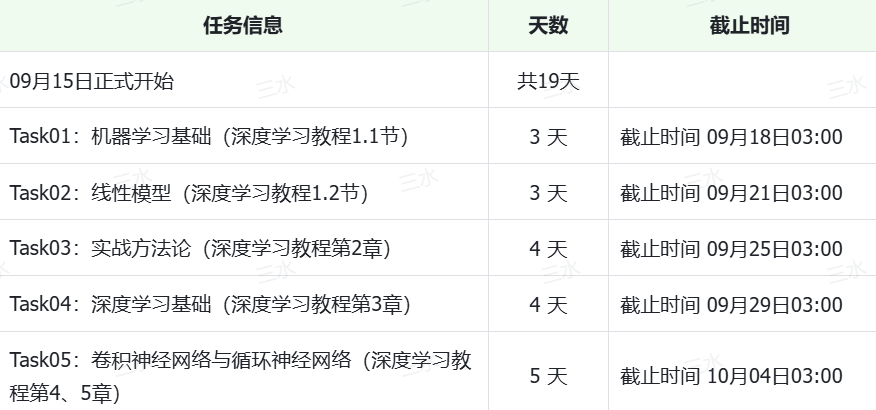